In [29]:
pip install matplotlib seaborn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 13.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 16.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Question 1

## Question 2a

In [27]:
df = pd.read_csv("converted_data.csv")

df_cleaned = df.dropna(subset=['Unique ID', 'Indicator ID', 'Name', 'Geo Place Name', 'Start Date', 'Data Value'])

df_cleaned['Year'] = pd.to_datetime(df_cleaned['Start Date'], errors='coerce').dt.year

pm_annual_avg = df_cleaned[
    (df_cleaned["Name"] == "Fine particles (PM 2.5)") & 
    (df_cleaned["Year"].between(2009, 2022))
]

borough_avg = pm_annual_avg.groupby(['Geo Place Name', 'Year'])['Data Value'].mean().reset_index()

nyc_avg = pm_annual_avg.groupby("Year")["Data Value"].mean().reset_index()
nyc_avg["Geo Place Name"] = "New York City"  

pm_annual_avg = pd.concat([borough_avg, nyc_avg], ignore_index=True)

pm_annual_avg.to_csv("pm_annual_avg.csv", index=False)

print("Processed data saved as pm_annual_avg.csv")

Processed data saved as pm_annual_avg.csv


/var/folders/qs/_lhr02x10x33snm5wyrb3s700000gn/T/ipykernel_55798/4042341673.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = pd.to_datetime(df_cleaned['Start Date'], errors='coerce').dt.year


## Question 2b

In [31]:
%matplotlib inline

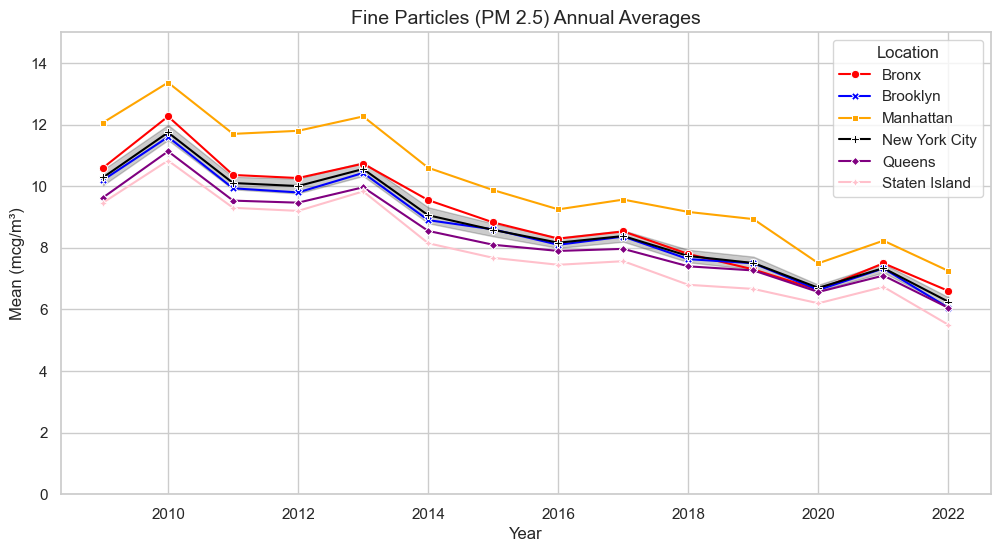

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

pm_annual_avg = pd.read_csv("pm_annual_avg.csv")

major_locations = ["New York City", "Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]

filtered_data = pm_annual_avg[pm_annual_avg["Geo Place Name"].isin(major_locations)]

palette = {
    "New York City": "black",
    "Bronx": "red",
    "Brooklyn": "blue",
    "Manhattan": "orange",
    "Queens": "purple",
    "Staten Island": "pink"
}

plt.figure(figsize=(12, 6))

# Create the line plot
sns.lineplot(
    data=filtered_data, 
    x="Year", 
    y="Data Value", 
    hue="Geo Place Name", 
    style="Geo Place Name", 
    markers=True, 
    dashes=False, 
    palette=palette
)

# Titles and labels
plt.title("Fine Particles (PM 2.5) Annual Averages", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean (mcg/m³)", fontsize=12)
plt.legend(title="Location")
plt.ylim(0, 15)  # Adjust the y-axis to match the original range

# Show the plot
plt.show()

## Question 3

In [39]:
data = pd.read_csv("converted_data.csv")
print(data.columns)

Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period',
       'Start Date', 'Data Value'],
      dtype='object')


/var/folders/qs/_lhr02x10x33snm5wyrb3s700000gn/T/ipykernel_55798/481378380.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/qs/_lhr02x10x33snm5wyrb3s700000gn/T/ipykernel_55798/481378380.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


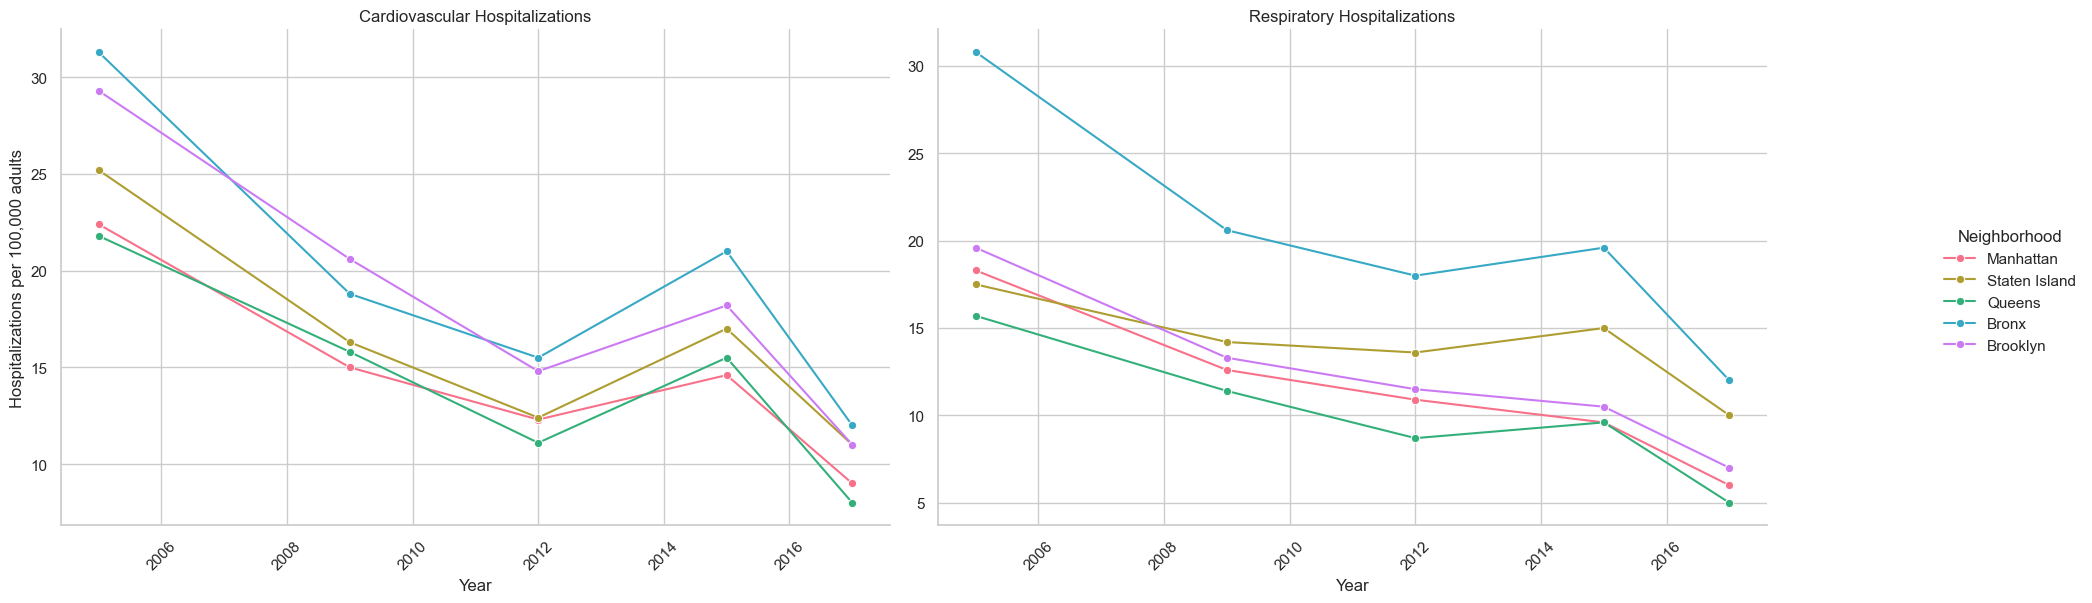

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cardiovascular = df[df["Name"].str.contains("Cardiovascular hospitalizations due to PM2.5", case=False, na=False) & 
                        (df["Geo Type Name"] == "Borough")].copy()

df_respiratory = df[df["Name"].str.contains("Respiratory hospitalizations due to PM2.5", case=False, na=False) & 
                     (df["Geo Type Name"] == "Borough")].copy()


df_cardiovascular['year'] = pd.to_datetime(df_cardiovascular['Start Date']).dt.year
df_respiratory['year'] = pd.to_datetime(df_respiratory['Start Date']).dt.year

df_combined.loc[:, "Type"] = df_combined["Type"].fillna("Unknown")
# Merge both datasets for a combined FacetGrid approach
df_cardiovascular['Type'] = "Cardiovascular"
df_respiratory['Type'] = "Respiratory"
df_combined = pd.concat([df_cardiovascular, df_respiratory])

# Define color palette for better distinction
palette = sns.color_palette("husl", df_combined['Geo Place Name'].nunique())

# Create FacetGrid to show two subplots in a single structure
g = sns.FacetGrid(df_combined, col="Type", hue="Geo Place Name", palette=palette, height=6, aspect=1.5, sharex=True, sharey=False)

# Map a lineplot onto the FacetGrid
g.map(sns.lineplot, "year", "Data Value", marker="o")

# Add titles and labels
g.set_axis_labels("Year", "Hospitalizations per 100,000 adults")
g.set_titles(col_template="{col_name} Hospitalizations")
g.add_legend(title="Neighborhood", bbox_to_anchor=(1, 0.5), loc="center left")

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Display the plot
plt.show()


In [57]:
print(df_combined.columns)

Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period',
       'Start Date', 'Data Value', 'year', 'Type'],
      dtype='object')


In [2]:
ls

README.md                   exercise_air_quality.ipynb*
Untitled.ipynb              parse_xml.py
air_quality.csv             requirements.txt*
air_quality.xml*            tests/
env/


In [12]:
print(df.isnull().sum())

Site ID      18026
Parameter    18026
Date         18026
Time         18026
Value        18026
Unit         18026
Site Name    18026
Latitude     18026
Longitude    18026
dtype: int64


In [24]:
print(df.head())

   Unique ID  Indicator ID                                   Name  \
0        NaN           NaN                                    NaN   
1   179772.0         640.0  Boiler Emissions- Total SO2 Emissions   
2   221956.0         386.0                             Ozone (O3)   
3   221806.0         386.0                             Ozone (O3)   
4   221836.0         386.0                             Ozone (O3)   

          Measure Measure Info Geo Type Name  Geo Join ID  \
0             NaN          NaN           NaN          NaN   
1  Number per km2       number         UHF42        409.0   
2            Mean          ppb         UHF34     305307.0   
3            Mean          ppb         UHF34        103.0   
4            Mean          ppb         UHF34        204.0   

             Geo Place Name  Time Period           Start Date  Data Value  
0                       NaN          NaN                  NaN         NaN  
1          Southeast Queens         2015  2015-01-01T00:00:00     